# FAKE NEWS DETECTION PROJECT

<b><u>Problem Statement:</b></u>
    
Fake news has become one of the biggest problems of our age. It has serious impact on our online as well as offline discourse. One can even go as far as saying that, to date, fake news poses a clear and present danger to western democracy and stability of the society.

<b><u>What is a Fake News?</u></b>

Fake news's simple meaning is to incorporate information that leads people to the wrong path. Nowadays fake news spreading like water and people share this information without verifying it. This is often done to further or impose certain ideas and is often achieved with political agendas.

For media outlets, the ability to attract viewers to their websites is necessary to generate online advertising revenue. So it is necessary to detect fake news.


In this project, we are using some machine learning and Natural language processing libraries like NLTK, re (Regular Expression), Scikit Learn.

# Importing Libraries

In [151]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

import re
import string
import warnings
warnings.filterwarnings("ignore")

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Hello
[nltk_data]     world\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Importing the dataset

In [3]:
df_fake = pd.read_csv(r"C:\Users\Hello world\Documents\Fake News Project\Fake.csv")
df_true = pd.read_csv(r"C:\Users\Hello world\Documents\Fake News Project\True.csv")

In [4]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
df_fake.shape

(23481, 4)

In [7]:
df_true.shape

(21417, 4)

# Inserting Label Column for datasets

In [8]:
df_fake['Label'] = 0
df_true['Label'] = 1

In [9]:
df_fake.head()

,title,text,subject,date,Label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [10]:
df_true.head()

,title,text,subject,date,Label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [11]:
print("Shape after inserting Label Column to the Fake dataset", df_fake.shape)
print("Shape after inserting Label Column to the True dataset", df_true.shape)

Shape after inserting Label Column to the Fake dataset (23481, 5)
Shape after inserting Label Column to the True dataset (21417, 5)


Here we are adding label column to our dataset. For fake.csv we are adding Label as 0 and for trur.csv we are adding Label as 1.

# Combining Two datasets

In [12]:
df1=pd.concat([df_fake, df_true], axis=0)  # Combined two datsets using Concat function

In [13]:
df1.head()

,title,text,subject,date,Label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [14]:
df1.shape

(44898, 5)

Here we are combinig our both datasets to a single dataset for data preprocessing to build our Machine learning models.

# Dropping unwanted columns

In [15]:
data=df1.drop(['title', 'subject', 'date'], axis=1)
data

,text,Label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
...,...,...
21412,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1
21413,"LONDON (Reuters) - LexisNexis, a provider of l...",1
21414,MINSK (Reuters) - In the shadow of disused Sov...,1
21415,MOSCOW (Reuters) - Vatican Secretary of State ...,1


We are dropping 'title', 'subject', 'date' columns from our dataset, these columns will not make any changes in our model building. so we drop unwanted columns using drop function.

# Checking Null values

In [16]:
data.isnull().sum()

text     0
Label    0
dtype: int64

<AxesSubplot:>

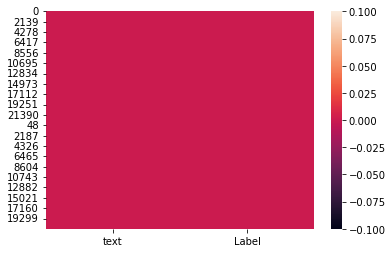

In [17]:
sns.heatmap(data.isnull())

As we see we don't have any Null Values in our dataset. We will once confirm with heatmap also. 

In [18]:
data.columns

Index(['text', 'Label'], dtype='object')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 21416
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    44898 non-null  object
 1   Label   44898 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.0+ MB


# Data Preprocessing

In [20]:
# Printing the stopwords in English
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Here we are printing in english obviously we are using english language only.

# Stemming

Stemming is the process of reducing a word to its Root word.

Example: actor, actress, acting --> act.

In [21]:
port_stem = PorterStemmer()

In [27]:
def stemming(text):
    stemmed_text = re.sub('[^a-zA-Z0-9]', ' ', text)
    stemmed_text = stemmed_text.lower()
    stemmed_text = stemmed_text.split()
    stemmed_text = [port_stem.stem(word) for word in stemmed_text if not word in stopwords.words('english')]
    stemmed_text = ' '.join(stemmed_text)
    return stemmed_text

In [29]:
data['text'] = data['text'].apply(stemming)

In [30]:
print(data['text'])

0        donald trump wish american happi new year leav...
1        hous intellig committe chairman devin nune go ...
2        friday reveal former milwauke sheriff david cl...
3        christma day donald trump announc would back w...
4        pope franci use annual christma day messag reb...
                               ...                        
21412    brussel reuter nato alli tuesday welcom presid...
21413    london reuter lexisnexi provid legal regulator...
21414    minsk reuter shadow disus soviet era factori m...
21415    moscow reuter vatican secretari state cardin p...
21416    jakarta reuter indonesia buy 11 sukhoi fighter...
Name: text, Length: 44898, dtype: object


We are done with stemming process.

# Now import the NLTK and download the Wordnet

In [76]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

def lemmatize(text):
    lm = WordNetLemmatizer()
    tokens = [lm.lemmatize(word) for word in text.split()]
    return " ".join(tokens)

[nltk_data] Downloading package wordnet to C:\Users\Hello
[nltk_data]     world\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Now apply the Lemmatize

In [77]:
data['text'] = data['text'].apply(lemmatize)

In [78]:
print(data['text'])

0        donald trump wish american happi new year leav...
1        hous intellig committe chairman devin nune go ...
2        friday reveal former milwauke sheriff david cl...
3        christma day donald trump announc would back w...
4        pope franci use annual christma day messag reb...
                               ...                        
21412    brussel reuter nato alli tuesday welcom presid...
21413    london reuter lexisnexi provid legal regulator...
21414    minsk reuter shadow disus soviet era factori m...
21415    moscow reuter vatican secretari state cardin p...
21416    jakarta reuter indonesia buy 11 sukhoi fighter...
Name: text, Length: 44898, dtype: object


Here we are completing Lemmitization process. It is the process of grouping together the inflected forms of a word so they can be analysed as a single item.

# Skewness

In [79]:
data.skew()

Label    0.092042
dtype: float64

As we know that out dataset only contains two columns one is text column, another one is Label column label column only have numerical values. So we check skewness with Label column there is no need to treat with the skewness.

# Summary statistics

In [80]:
data.describe()

,Label
count,44898.000000
mean,0.477015
std,0.499477
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [81]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Label,44898.0,0.477015,0.499477,0.0,0.0,0.0,1.0,1.0


As we discussed above with skewness there is only two columns, So that we check summary description only for label column.

# Vectorizer

<b>Splitting data into two parts Input and Target Variable</b>

In [84]:
x = data['text']
y = data['Label']

In [85]:
x

0        donald trump wish american happi new year leav...
1        hous intellig committe chairman devin nune go ...
2        friday reveal former milwauke sheriff david cl...
3        christma day donald trump announc would back w...
4        pope franci use annual christma day messag reb...
                               ...                        
21412    brussel reuter nato alli tuesday welcom presid...
21413    london reuter lexisnexi provid legal regulator...
21414    minsk reuter shadow disus soviet era factori m...
21415    moscow reuter vatican secretari state cardin p...
21416    jakarta reuter indonesia buy 11 sukhoi fighter...
Name: text, Length: 44898, dtype: object

In [86]:
y

0        0
1        0
2        0
3        0
4        0
        ..
21412    1
21413    1
21414    1
21415    1
21416    1
Name: Label, Length: 44898, dtype: int64

In [103]:
# Converting text data into numeric data using TfidfVectorizer.
vectorizer = TfidfVectorizer()
vectorizer.fit(x)

TfidfVectorizer()

In [104]:
x = vectorizer.transform(x)

In [106]:
print(x)

  (0, 93783)	0.23351985305781142
  (0, 93728)	0.07534470099300389
  (0, 92834)	0.027759369130117718
  (0, 92701)	0.02379291507262534
  (0, 92619)	0.016457117583025687
  (0, 92604)	0.023842923706966803
  (0, 92524)	0.030190472684239196
  (0, 92253)	0.16252511153357022
  (0, 91397)	0.02327740961703059
  (0, 91386)	0.07822306146897443
  (0, 91375)	0.05318974403893264
  (0, 91347)	0.07822306146897443
  (0, 90719)	0.032704275544353525
  (0, 90191)	0.018720377473294948
  (0, 88672)	0.03296395244832598
  (0, 86693)	0.019976890841151413
  (0, 86633)	0.09786616486044272
  (0, 85969)	0.0847388941500916
  (0, 84051)	0.017989682735298072
  (0, 83679)	0.07822306146897443
  (0, 83625)	0.04945980313262895
  (0, 83376)	0.023154932386092824
  (0, 83136)	0.03933130159810911
  (0, 82503)	0.019426456670920897
  (0, 82482)	0.07534470099300389
  :	:
  (44897, 22953)	0.09541908000959083
  (44897, 22703)	0.043769027214467196
  (44897, 22658)	0.2665685758237726
  (44897, 22305)	0.0881235343552107
  (44897, 196

Here we are converting text into numeric data using Vectorizer.

In [107]:
# Already our label column is Numeric data.
y

0        0
1        0
2        0
3        0
4        0
        ..
21412    1
21413    1
21414    1
21415    1
21416    1
Name: Label, Length: 44898, dtype: int64

# SMOTE

In [108]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [109]:
y.value_counts()

0    23481
1    23481
Name: Label, dtype: int64

 We are done with SMOTE technique, to handle imbalance in our dataset.

# Finding the best random state

In [114]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    acc = accuracy_score(y_test, predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu," on Random_state ",maxRS)

Best accuracy is 0.9860884377883455  on Random_state  59


Here we see that out of the random state value ranging from 1 to 200 the best random state number found is 59 and we will use this in our ML models.

# Creating train_test_split

In [115]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [116]:
x_train.shape

(32873, 95399)

In [117]:
x_test.shape

(14089, 95399)

In [118]:
y_train.shape

(32873,)

In [119]:
y_test.shape

(14089,)

I am going to built a Classification function that splits the training and testing features and labels, then trains the model, generates the accuracy_score, confusion_matrix, classification_report, calculates the Cross Validation score and finally going to select best model.

# Logistic Regression

In [122]:
LR=LogisticRegression()
LR.fit(x_train, y_train)
predlr=LR.predict(x_test)
print("Accuaracy", accuracy_score(y_test, predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuaracy 98.60884377883455
[[6943  106]
 [  90 6950]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      7049
           1       0.98      0.99      0.99      7040

    accuracy                           0.99     14089
   macro avg       0.99      0.99      0.99     14089
weighted avg       0.99      0.99      0.99     14089



In [123]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(LR, x, y, cv=5)
print("Cross validation score of Logistic Regression model:", scr.mean())

Cross validation score of Logistic Regression model: 0.9742981675070294


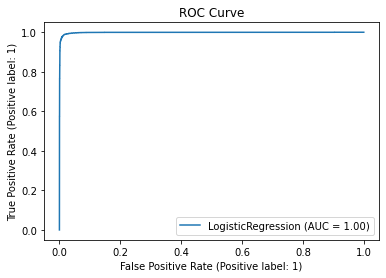

In [124]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(LR, x_test, y_test)
plt.title("ROC Curve")
plt.show()

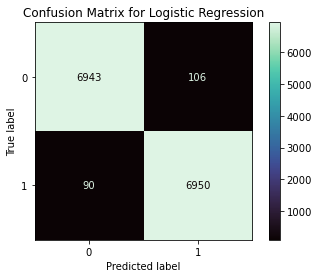

In [127]:
metrics.plot_confusion_matrix(LR, x_test, y_test, cmap='mako')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

Created the linear regression model and checked for all it's evaluation metrics and ROC curve as well.

# Decision Tree Classifier

In [128]:
dtr=DecisionTreeClassifier()
dtr.fit(x_train, y_train)
preddtr=dtr.predict(x_test)
print("Accuaracy", accuracy_score(y_test, preddtr)*100)
print(confusion_matrix(y_test,preddtr))
print(classification_report(y_test,preddtr))

Accuaracy 99.61672226559728
[[7030   19]
 [  35 7005]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7049
           1       1.00      1.00      1.00      7040

    accuracy                           1.00     14089
   macro avg       1.00      1.00      1.00     14089
weighted avg       1.00      1.00      1.00     14089



In [130]:
scr=cross_val_score(dtr, x, y, cv=5)
print("Cross validation score of Decision Tree Classifier model:", scr.mean())

Cross validation score of Decision Tree Classifier model: 0.9926110385946547


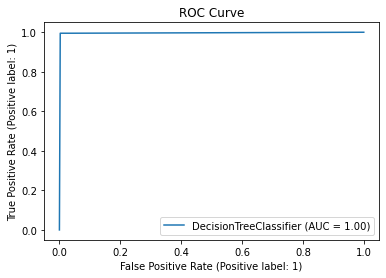

In [131]:
plot_roc_curve(dtr, x_test, y_test)
plt.title("ROC Curve")
plt.show()

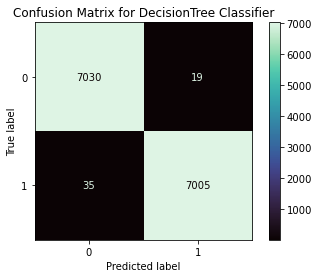

In [132]:
metrics.plot_confusion_matrix(dtr, x_test, y_test, cmap='mako')
plt.title('Confusion Matrix for DecisionTree Classifier')
plt.show()

Created the Decision Tree Classification model and checked for all it's evaluation metrics and ROC Curve as well.

# KNNeighbors Classifier

In [133]:
knc=KNeighborsClassifier()
knc.fit(x_train, y_train)
predknc=knc.predict(x_test)
print("Accuaracy", accuracy_score(y_test, predknc)*100)
print(confusion_matrix(y_test,predknc))
print(classification_report(y_test,predknc))

Accuaracy 56.12179714671019
[[ 916 6133]
 [  49 6991]]
              precision    recall  f1-score   support

           0       0.95      0.13      0.23      7049
           1       0.53      0.99      0.69      7040

    accuracy                           0.56     14089
   macro avg       0.74      0.56      0.46     14089
weighted avg       0.74      0.56      0.46     14089



In [134]:
scr=cross_val_score(knc, x, y, cv=5)
print("Cross validation score of KNeighbors Classifier model:", scr.mean())

Cross validation score of KNeighbors Classifier model: 0.5711881138242967


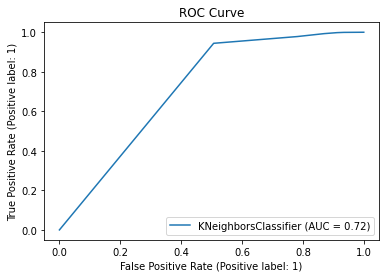

In [135]:
plot_roc_curve(knc, x_test, y_test)
plt.title("ROC Curve")
plt.show()

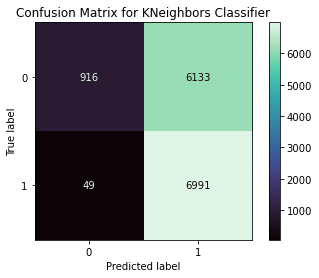

In [136]:
metrics.plot_confusion_matrix(knc, x_test, y_test, cmap='mako')
plt.title('Confusion Matrix for KNeighbors Classifier')
plt.show()

Created the KNNeighbors Classification model and checked for all it's evaluation metrics and ROC Curve as well.

# Ensemble Technique

# Random Forest Classifier

In [140]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=200)
rf.fit(x_train, y_train)
predrf=rf.predict(x_test)
print("Accuaracy", accuracy_score(y_test, predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuaracy 99.33991056852864
[[6986   63]
 [  30 7010]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      7049
           1       0.99      1.00      0.99      7040

    accuracy                           0.99     14089
   macro avg       0.99      0.99      0.99     14089
weighted avg       0.99      0.99      0.99     14089



In [141]:
scr=cross_val_score(rf, x, y, cv=5)
print("Cross validation score of RandomForest Classifier model:", scr.mean())

Cross validation score of RandomForest Classifier model: 0.9832201945121698


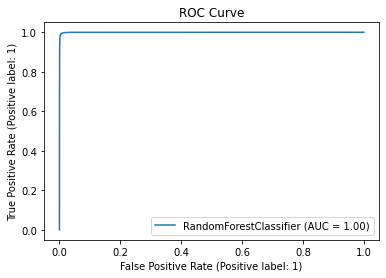

In [142]:
plot_roc_curve(rf, x_test, y_test)
plt.title("ROC Curve")
plt.show()

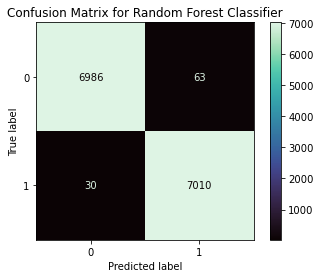

In [143]:
metrics.plot_confusion_matrix(rf, x_test, y_test, cmap='mako')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

Created the Random Forest Classification model and checked for all it's evaluation metrics and ROC Curve as well.

# AdaBoost Classifier

In [144]:
from sklearn.ensemble import AdaBoostClassifier

ad=AdaBoostClassifier()
ad.fit(x_train, y_train)
predad=ad.predict(x_test)
print("Accuaracy", accuracy_score(y_test, predad)*100)  # testing accuracy
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

Accuaracy 99.62382000141955
[[7020   29]
 [  24 7016]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7049
           1       1.00      1.00      1.00      7040

    accuracy                           1.00     14089
   macro avg       1.00      1.00      1.00     14089
weighted avg       1.00      1.00      1.00     14089



In [145]:
scr=cross_val_score(ad, x, y, cv=5)
print("Cross validation score of AdaBoostClassifier model:", scr.mean())

Cross validation score of AdaBoostClassifier model: 0.9936756181113523


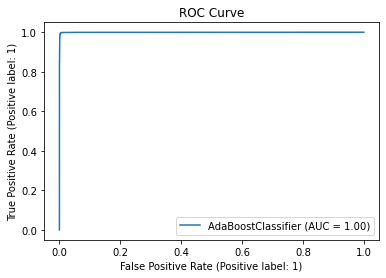

In [146]:
plot_roc_curve(ad, x_test, y_test)
plt.title("ROC Curve")
plt.show()

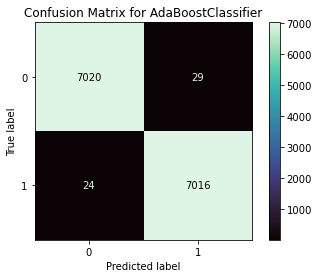

In [147]:
metrics.plot_confusion_matrix(ad, x_test, y_test, cmap='mako')
plt.title('Confusion Matrix for AdaBoostClassifier')
plt.show()

Created the AdaBoost Classification model and checked for all it's evaluation metrics and ROC Curve as well.

# Hyperparameter Tuning

In [152]:
AdaBoostClassifier()

AdaBoostClassifier()

In [158]:
from sklearn.model_selection import GridSearchCV

parameters={'algorithm':['SAMME','SAMME.R'],
           'learning_rate':[0.0001, 0.001, 0.01, 0.1, 1.0],
           'n_estimators':[10,50,100,500]}

After comparing all the regression models I have selected AdaBoost Classifier as my best model and have listed down it's parameters above referring the sklearn webpage.

In [160]:
GCV=GridSearchCV(estimator=AdaBoostClassifier(),
                param_grid=parameters,
                n_jobs=-1,
                cv=5,
                scoring='accuracy')

In [ ]:
GCV.fit(x_train,y_train)

I have trained the Grid Search CV with the list of parameters I feel it should check for best possible outcomes.

In [ ]:
GCV.best_params_

In [ ]:
type(GCV)

In [ ]:
AdaBoostClassifier()

In [ ]:
GCV.best_estimator_

In [ ]:
GCV_pred=GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

I have successfully incorporated the Hyper Parameter Tuning on my Final Model and received the accuracy_score for it.

# Saving the best model

In [ ]:
import joblib

joblib.dump(ad,'Fakemodel.obj')

FakeNews_loadmodel=joblib.load('Fakemodel.obj')
FakeNews_loadmodel.predict(x_test)

Finally, I am saving my best Classification model using the joblib library.

In [ ]:
conclusion=pd.DataFrame([insurance_loadmodel.predict(x_test)[:],predad[:]],index=['Predicted','Original'])
conclusion

Using the best Classification model I have predicted the results.